In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from PIL import Image

In [5]:
import pandas as pd
train_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/train'
emotion_labels = os.listdir(train_dir)
label_map = {label: idx for idx, label in enumerate(sorted(emotion_labels))}

data = []

for label in emotion_labels:
    label_path = os.path.join(train_dir, label)
    for filename in os.listdir(label_path):
        file_path = os.path.join(label_path, filename)
        try:
            img = Image.open(file_path).convert('L')  # Chuyển về grayscale
            img = img.resize((48, 48))  # Resize về 48x48
            pixel_values = np.array(img).flatten()
            pixel_str = ' '.join(str(pixel) for pixel in pixel_values)
            data.append([label_map[label], pixel_str, "Training"])
        except Exception as e:
            print(f"Lỗi khi xử lý {file_path}: {e}")

# Tạo DataFrame với 3 cột: emotion, pixels, Usage
df = pd.DataFrame(data, columns=['emotion', 'pixels', 'Usage'])
df.to_csv('emotion_dataset.csv', index=False)
print("✅ Đã lưu dữ liệu vào 'emotion_dataset.csv'.")

✅ Đã lưu dữ liệu vào 'emotion_dataset.csv'.


In [22]:
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'
emotion_labels = os.listdir(train_dir)
label_map = {label: idx for idx, label in enumerate(sorted(emotion_labels))}

data = []

for label in emotion_labels:
    label_path = os.path.join(val_dir, label)
    for filename in os.listdir(label_path):
        file_path = os.path.join(label_path, filename)
        try:
            img = Image.open(file_path).convert('L')  # Chuyển về grayscale
            img = img.resize((48, 48))  # Resize về 48x48
            pixel_values = np.array(img).flatten()
            pixel_str = ' '.join(str(pixel) for pixel in pixel_values)
            data.append([label_map[label], pixel_str, "Validation"])
        except Exception as e:
            print(f"Lỗi khi xử lý {file_path}: {e}")

# Tạo DataFrame với 3 cột: emotion, pixels, Usage
df = pd.DataFrame(data, columns=['emotion', 'pixels', 'Usage'])
df.to_csv('emotion_dataset_valitation.csv', index=False)
print("✅ Đã lưu dữ liệu vào 'emotion_dataset_valitation.csv'.")

✅ Đã lưu dữ liệu vào 'emotion_dataset_valitation.csv'.


In [17]:
emotion_labels = sorted(os.listdir(train_dir))
print("Các thư mục nhãn có trong train_dir:")
print(emotion_labels)

for label in emotion_labels:
    label_path = os.path.join(train_dir, label)
    print(f"{label}: {len(os.listdir(label_path))} ảnh")

Các thư mục nhãn có trong train_dir:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry: 3993 ảnh
disgust: 436 ảnh
fear: 4103 ảnh
happy: 7164 ảnh
neutral: 4982 ảnh
sad: 4938 ảnh
surprise: 3205 ảnh


In [2]:
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

In [4]:
import os

# Đặt đường dẫn đến thư mục validation
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

emotion_labels = sorted(os.listdir(val_dir))
print("Các thư mục nhãn có trong val_dir:")
print(emotion_labels)

for label in emotion_labels:
    label_path = os.path.join(val_dir, label)
    print(f"{label}: {len(os.listdir(label_path))} ảnh")

Các thư mục nhãn có trong val_dir:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry: 960 ảnh
disgust: 111 ảnh
fear: 1018 ảnh
happy: 1825 ảnh
neutral: 1216 ảnh
sad: 1139 ảnh
surprise: 797 ảnh


In [18]:
import pandas as pd
data = pd.read_csv('emotion_dataset.csv')
data.head(20)

,emotion,pixels,Usage
0,0,72 78 81 75 59 54 63 61 55 55 62 46 93 114 121...,Training
1,0,152 149 147 157 146 133 114 138 170 175 184 15...,Training
2,0,29 25 21 23 26 24 49 67 85 101 121 125 130 140...,Training
3,0,32 23 20 56 43 34 38 46 92 99 34 21 27 27 31 4...,Training
4,0,222 218 202 189 199 208 193 134 103 89 37 41 5...,Training
5,0,238 239 237 234 232 228 231 203 170 152 166 18...,Training
6,0,35 26 25 14 12 14 17 20 22 22 24 24 46 35 29 2...,Training
7,0,120 119 120 121 121 122 122 123 122 120 124 12...,Training
8,0,255 255 254 255 250 223 179 125 119 106 96 97 ...,Training
9,0,73 77 79 105 130 128 92 81 76 55 58 44 71 76 7...,Training


In [24]:
import pandas as pd
data = pd.read_csv('emotion_dataset_valitation.csv')
data.head(20)

,emotion,pixels,Usage
0,0,58 66 70 77 117 154 137 108 76 70 76 82 88 80 ...,Validation
1,0,23 26 21 9 6 19 33 11 3 63 89 73 39 33 42 36 2...,Validation
2,0,201 182 182 184 205 204 203 220 223 228 231 23...,Validation
3,0,93 86 78 78 80 92 109 99 104 107 114 130 148 1...,Validation
4,0,11 6 1 0 0 1 0 0 2 0 0 1 0 2 3 0 0 0 1 0 0 0 1...,Validation
5,0,93 93 91 92 90 94 78 75 147 104 81 117 102 100...,Validation
6,0,5 11 9 11 14 13 15 1 26 34 35 19 40 73 39 64 7...,Validation
7,0,41 4 1 1 26 67 94 122 113 107 117 131 136 127 ...,Validation
8,0,161 150 156 177 198 205 205 210 211 211 207 19...,Validation
9,0,67 75 81 83 90 104 113 111 127 134 144 144 148...,Validation


In [19]:
x_data = np.array(df['pixels'].apply(lambda x: np.fromstring(x, sep=' ')).tolist(), dtype=np.float32)
x_data = x_data.reshape(-1, 48, 48, 1) / 255.0

y_data = df['emotion'].values
y_data = to_categorical(y_data, num_classes=7)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [20]:
label_to_text = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Surprise'
}

<Figure size 1400x800 with 0 Axes>

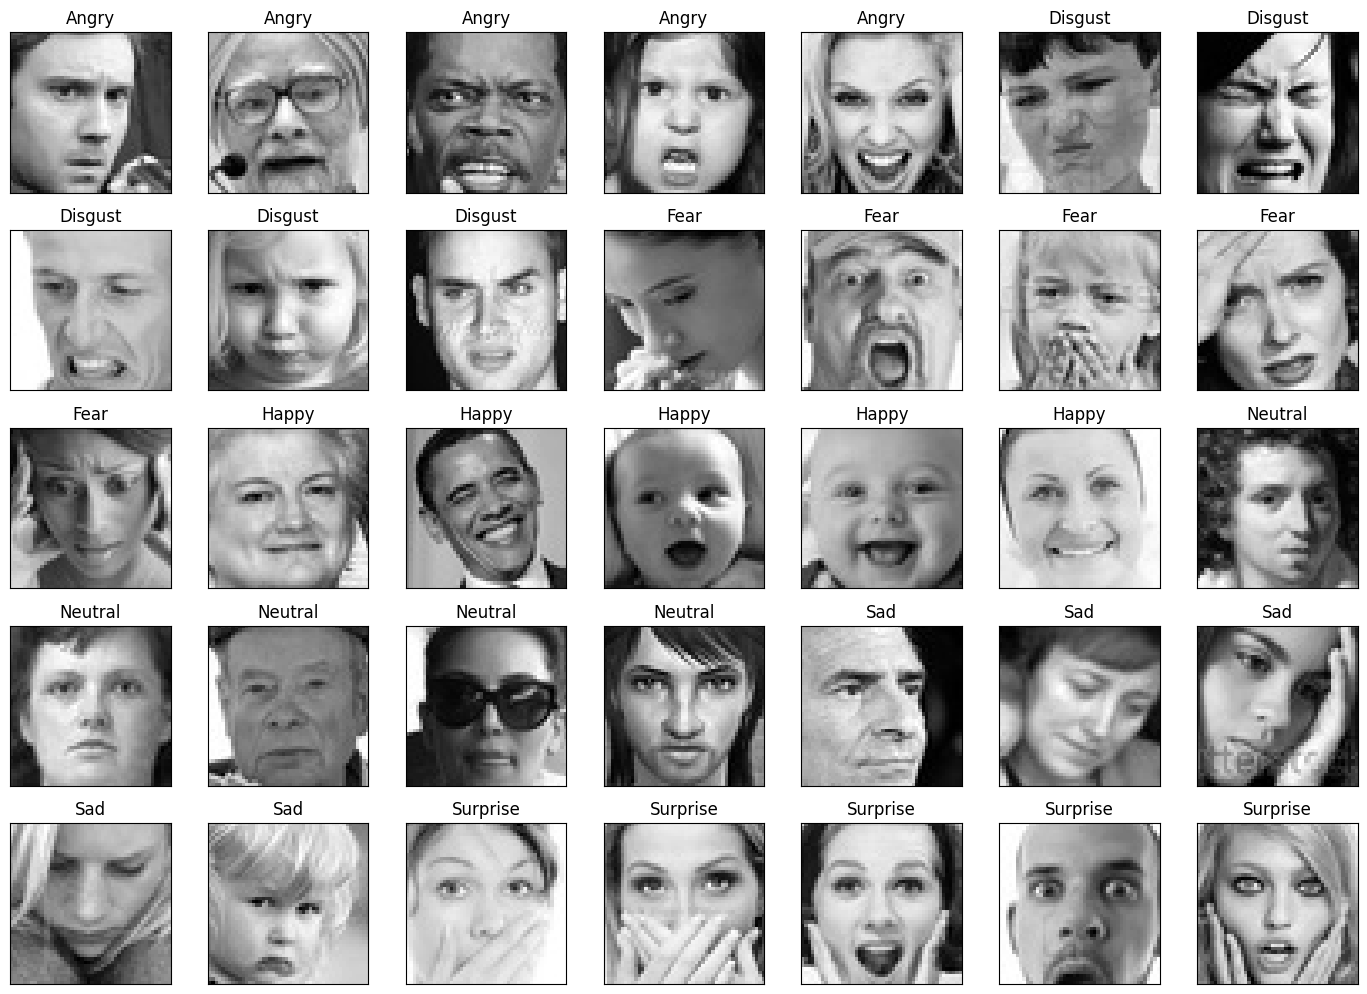

<Figure size 1400x800 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df['emotion'].unique()):
    images = df[df['emotion'] == label].head(5)  # lấy 5 ảnh đầu
    for i in range(len(images)):
        px = np.array(images.iloc[i]['pixels'].split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

plt.figure(figsize=(14, 8))